## Assignment 3

A hat contains 2024 pieces of paper numbered 1 through 2024. I draw two pieces of paper at random from the hat. The smaller of the two numbers drawn is subtracted from the larger. That difference is written on a new piece of paper which is placed in the hat, and the two original pieces are discarded. I repeat this process until one piece of paper remains.

What can you tell about the final piece of paper?

In [58]:
# code to play the game

# check it is working correctly
import numpy as np
import matplotlib.pyplot as plt


def play():
  n = 2024 # length of list

  # create the list
  paper = []
  for p in range(1,n+1):
    paper.append(p)

  # play the game
  while len(paper) > 1:
    #print(paper)
    i1 = np.random.randint(len(paper))
    x = paper[i1]
    del paper[i1]

    i2 = np.random.randint(len(paper))
    y = paper[i2]
    del paper[i2]

    paper.append(np.abs(x-y))

    #print("We have drawn "+str(x)+" and "+str(y))
    #print("We add "+str(np.abs(x-y))+" to the list")
    #print("The list is now "+str(len(paper))+ " long \n")

  return paper[0]

play()


96

In [59]:
paper = []
n=2024
for p in range(1,n+1):
  paper.append(p)

print(np.random.choice(paper,2, replace=False))

[1406 1289]


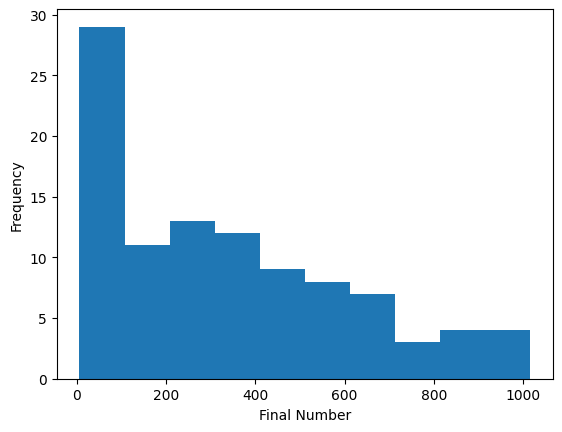

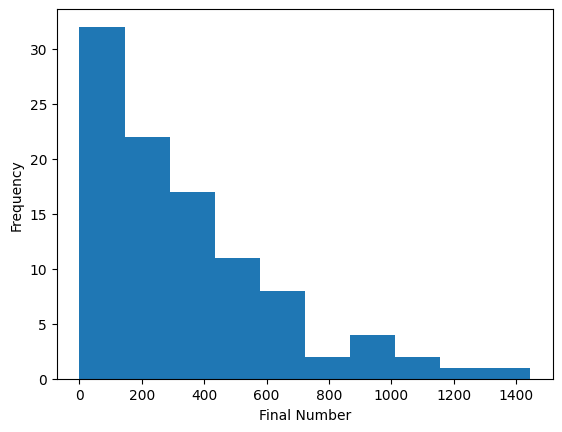

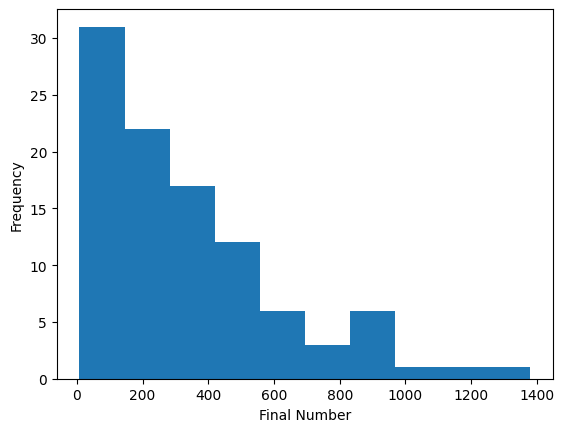

In [60]:
# now we want to run this game several times

# code to play the game
import numpy as np
import matplotlib.pyplot as plt

def run():
  samples = 100
  data = []
  for s in range(samples):
    data.append(play())

  plt.hist(data)
  plt.xlabel("Final Number")
  plt.ylabel("Frequency")
  plt.show()

run()
run()
run()

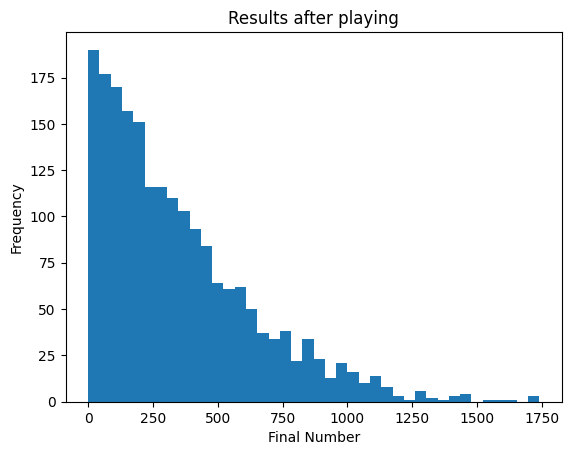

In [61]:
# hmm lets get some more detail on exactly what numbers we're getting here

def get_data(samples):
  data = []
  for k in range(samples):
    data.append(play())
  return data

samples = 2000
data = get_data(samples)
plt.hist(data, bins=int(np.floor(len(data)*40/(samples))))
plt.xlabel("Final Number")
plt.ylabel("Frequency")
plt.title("Results after playing")
plt.show()

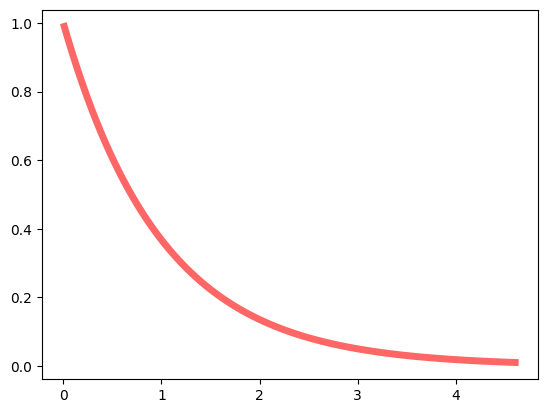

In [62]:
# lets try fit this data to a known distribution and find the parameters

from scipy.stats import expon

fig, ax = plt.subplots(1, 1)

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

plt.show()

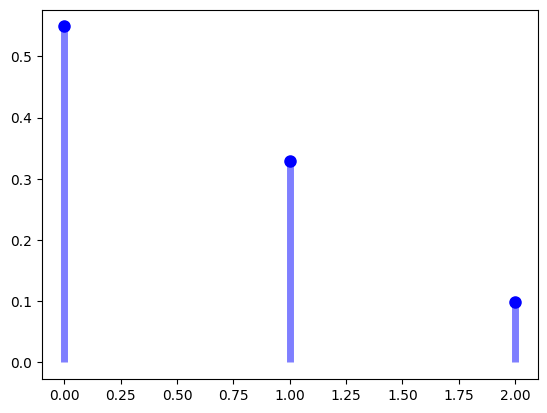

In [63]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = 0.6
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

## Fitting the data to a known distribution

The exponential distribution seems to be a good fit for our data (the final number in the hat). Recall that $X \sim \text{Exp}(\lambda)$ if $X$ has probability density function

$$
f_X(x)=
\begin{cases}
			\lambda e^{-\lambda x}, & \text{if $x\geq0$}\\
            0, & \text{otherwise}
		 \end{cases}
$$

We need to find out which value of $\lambda$ best fits our data

lambda = 1/349


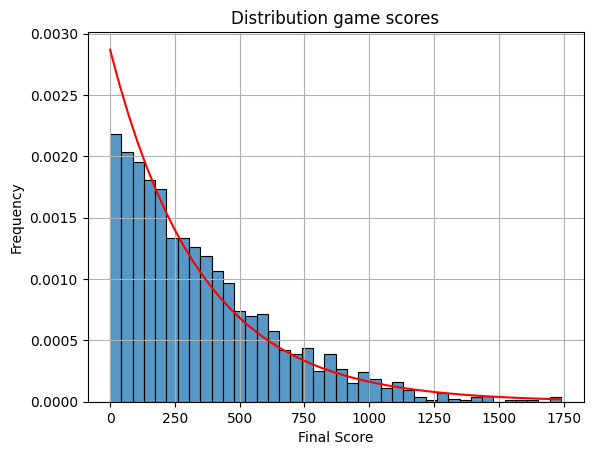

In [64]:
from scipy.stats import expon
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(1, 1)
x = np.linspace(min(data), max(data))

sns.histplot(data, bins=40,
             stat = 'density', ax=ax)
ax.set_title(f'Distribution game scores')
ax.set_ylabel('Frequency')
ax.set_xlabel('Final Score')
parameter = stats.expon.fit(data) # this function finds the optimal lambda for our data
y = stats.expon.pdf(x, loc = parameter[0],scale = parameter[1])
ax.plot(x,y, 'r')
ax.grid('on')
print("lambda = 1/"+str(round(parameter[1])))

## Game scores distributed exponentially

From the analysis above, we see that the final game scores $X$ are distributed exponentially with parameter $\lambda ≈ 1/337$. From this we can deduce various probabilities for games. For example,

$$
\text{Pr}(X\geq500)=1 - \int_{0}^{500}\lambda e^{-\lambda x}\text{d}x \approx 0.226...
$$





In [65]:
Mcount = sum(i > 500 for i in data)
Ans = Mcount/len(data)
print(f'{round(Ans*100)}% of the final scores were >500. '
f'P(X>500)={Ans}')

25% of the final scores were >500. P(X>500)=0.2475


So our data tends to agree with our model. This is fantastic because all of the infomation for this dataset we have generated is now being stored in the choice of exponential distribution and parameter $\lambda \approx 1/337$

## Possion for Discrete Data

Let's try the possion distribution instead as our data is discrete, not continuous. $X\sim\text{Poi}(\mu)$ if



In [67]:
'''from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)
x = np.linspace(min(data), max(data))

sns.histplot(data, bins=40,
             stat = 'density', ax=ax)
ax.set_title(f'Distribution game scores')
ax.set_ylabel('Frequency')
ax.set_xlabel('Final Score')
parameter = stats.poisson.fit(data) # this function finds the optimal lambda for our data
y = stats.poisson.pdf(arange(1,2000), loc = parameter[0],scale = parameter[1])
ax.plot(x,y, 'r')
ax.grid('on')
print("lambda = 1/"+str(round(parameter[1])))
'''

'from scipy.stats import poisson\nfig, ax = plt.subplots(1, 1)\nx = np.linspace(min(data), max(data))\n\nsns.histplot(data, bins=40,\n             stat = \'density\', ax=ax)\nax.set_title(f\'Distribution game scores\')\nax.set_ylabel(\'Frequency\')\nax.set_xlabel(\'Final Score\')\nparameter = stats.poisson.fit(data) # this function finds the optimal lambda for our data\ny = stats.poisson.pdf(arange(1,2000), loc = parameter[0],scale = parameter[1])\nax.plot(x,y, \'r\')\nax.grid(\'on\')\nprint("lambda = 1/"+str(round(parameter[1])))\n'

## Statistics

We can try to discribe this distribution with a statistial model. If we get the mean $\mu$ and variance $\sigma$, we can rescale our data, standardising it.

We have $n=2024$ random variables $X_1,...,X_n$ where $X_i$ is the number on the final slip of paper after completing the $i$th game. As each game is played independently and each game follows the same rules these are independent identically distributed random variables.

We can see if the mean of these random variables agrees with the CLT.

In [68]:
from scipy import stats
import seaborn as sns

print(np.mean(data))
print(np.median(data))
print(stats.mode(data))

348.566
276.0
ModeResult(mode=54, count=16)


In [ ]:
# We now want code to generate and store the means of our game

means = []
size = 100
mu_size = 100

for i in range(mu_size):
  samples = get_data(size)
  mu = np.mean(samples)
  means.append(mu)

fig,(ax1, ax2)=plt.subplots(1,2,figsize=(7,3))
x1 = np.linspace(min(means),max(means))
x2 = np.linspace(min(means), max(means))
MU = np.mean(means)
SIGMA = np.sqrt(np.var(means, ddof=1))
pdf = stats.norm.pdf(x2, MU, SIGMA)
ax1.plot(x1, pdf)
ax1.set_title(f'Normal')
ax1.grid('on')
print(means)

sns.histplot(means, bins=25,
             stat = 'density', ax=ax2)
ax2.set_title(f'Distribution of sample mean')
ax2.set_ylabel('')
y2 = stats.norm.pdf(x2, MU, SIGMA)
ax2.plot(x2,y2, 'r')
ax2.grid('on')

print(f'Mean is',MU)
print(f'Variance is ',SIGMA)

## Extending



In [ ]:
def play(n):
  # create the list
  paper = []
  for p in range(1,n+1):
    paper.append(p)

  # play the game
  while len(paper) > 1:
    i1 = np.random.randint(len(paper))
    x = paper[i1]
    del paper[i1]

    i2 = np.random.randint(len(paper))
    y = paper[i2]
    del paper[i2]

    paper.append(np.abs(x-y))

  return paper[0]


def get_data(n, samples):
  data = []
  for k in range(samples):
    data.append(play(n))
  return data

def various_n():
  samples = 10
  n = np.logspace(1, 5, num=10, endpoint=True, base=10.0, dtype=int)
  params = []
  for k in range(len(n)):
    data = get_data(n[k],100)
    params.append(stats.expon.fit(data)[1])

  plt.plot(n,params)
  plt.xlabel("Game size")
  plt.ylabel('$\lambda$ size')
  plt.title("Game size against exponential distribution parameter")
  plt.show()

various_n()
